# Creating a Voronoi mesh from a GMSH mesh

First we need to create a mesh. Here we use [Gmsh](https://gmsh.info/) and create a triangular mesh with a local grid refinement using the Frontal-Delauney-Algorithm.

    // Geometry
    SetFactory("OpenCASCADE");
    Circle(1) = {0.0,0.0,0.0,1000.0,0.0,2*Pi};
    Curve Loop(1) = {1};
    Plane Surface(1) = {1};

    // Mesh refinement
    Field[1] = MathEval;
    Field[1].F = "0.3*(Sqrt(x^2 + y^2))^0.8+1.0";
    Background Field = 1;

    // Options
    Mesh.CharacteristicLengthFromPoints = 0;
    Mesh.CharacteristicLengthExtendFromBoundary = 0;
    Mesh.MeshSizeFromCurvature = 0;
    Mesh.Algorithm = 6;

After meshing, we can save the mesh to a file. Now we can switch to Python and read the mesh with [meshio](https://github.com/nschloe/meshio)

In [1]:
import meshio
mesh = meshio.read("./mesh/circle.msh")
points = mesh.points

points

array([[1000.        ,    0.        ,    0.        ],
       [ 997.13604528,   75.62874588,    0.        ],
       [ 988.56058559,  150.82429716,    0.        ],
       ...,
       [ 109.65476416,  128.54861141,    0.        ],
       [ 370.80378341,  447.01151374,    0.        ],
       [ -62.24480108,  -51.78637557,    0.        ]])

We use the points from this mesh to create the Voronoi mesh. Because `Voronoi()` create a 2D Voronoi decomposition only, we need to pass an array with two dimensions. 

In [2]:
from voromesh import Voronoi
voro = Voronoi(points[:, :2], buffer_size=40.0)
mesh = voro.to_pyvista()
mesh.save("./mesh/circle.vtu")

The mesh can be plotted with Pyvista.

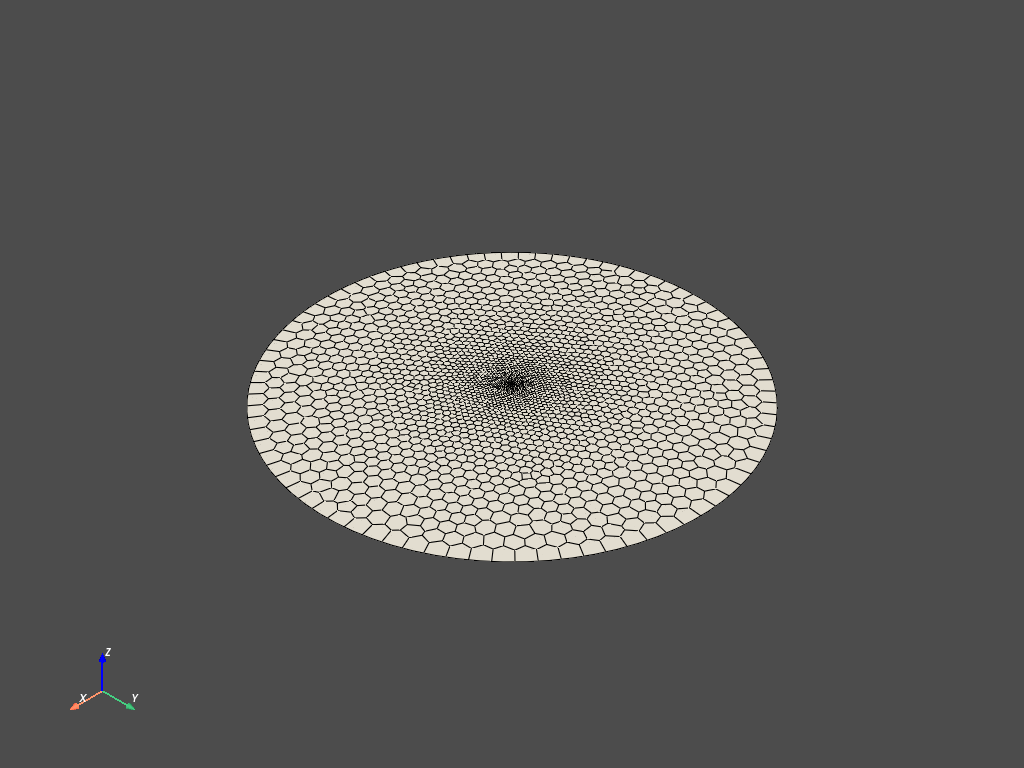

In [3]:
# Plot the grid in notebook
import pyvista as pv
pv.set_jupyter_backend('static')
mesh.plot(notebook=True, show_edges=True)